Chart of Data:
   Controls no stimulation  Controls Spike  Controls N-term  Controls C-term
0                    0.170           0.072            0.110            0.091
1                    0.072           0.200            0.035            0.180
2                    0.320           0.330            0.490            0.310
---------------Pearson's Chi-Squared Test----------------
--------------Interpreting alpha at 0.05---------------
Independent (H0 holds true)
--------------Interpreting alpha at 0.005---------------
Independent (H0 holds true)
--------------Interpreting alpha at 0.0005---------------
Independent (H0 holds true)


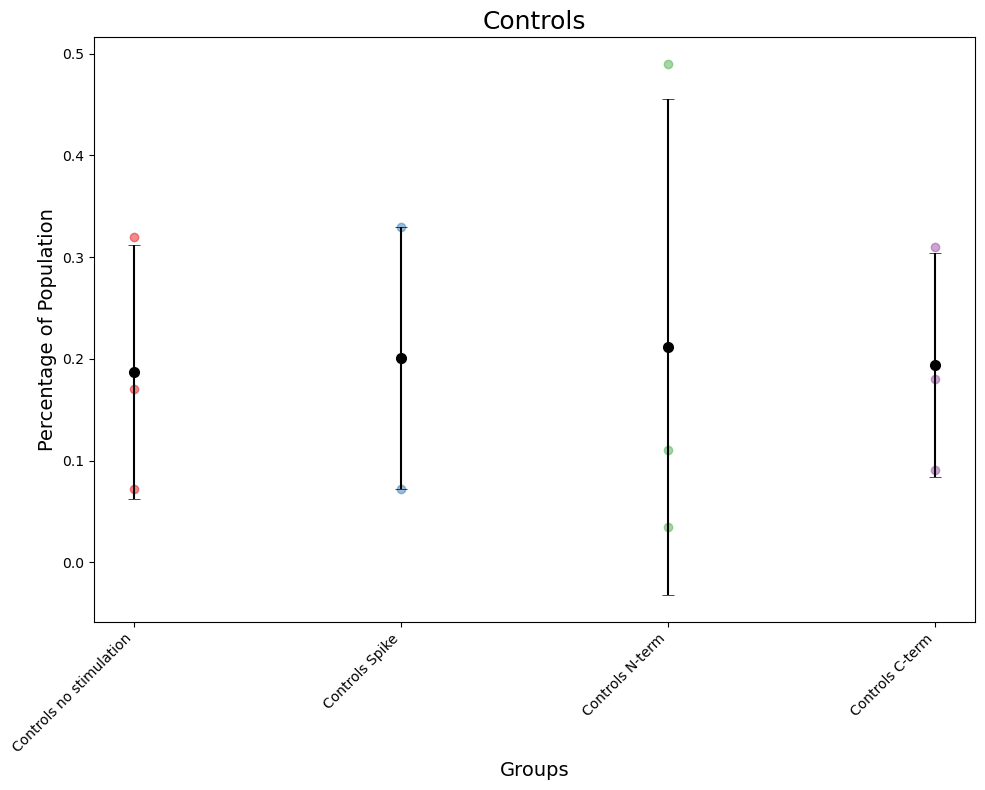

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

# Place the file path here (replace csv filename)
csv_file = "controls.csv"

# Define the title and axis labels
title = 'Controls'
xlabel = 'Groups'
ylabel = 'Percentage of Population'

# Load the CSV data into a DataFrame
data = pd.read_csv(csv_file, sep=',', header=0, na_values=".")

# Print basic information about the data
print("Chart of Data:")
print(data)

# Perform Chi-squared test
print("---------------Pearson's Chi-Squared Test----------------")
chi2_result = chi2_contingency(data)
p = chi2_result[1]
alpha_levels = [0.05, 0.005, 0.0005]

for alpha in alpha_levels:
    print(f"--------------Interpreting alpha at {alpha}---------------")
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

# Create a single plot for all columns
fig, ax = plt.subplots(figsize=(10, 8))

# Set a list of colors for each column
colors = sns.color_palette("Set1", len(data.columns))

# Plot the data points with different colors for each column
for idx, col in enumerate(data.columns):
    col_data = data[col]
    col_mean = col_data.mean()
    col_stdv = col_data.std()
    ax.plot(idx, col_mean, color='black', marker='o', markersize=7)
    ax.errorbar(idx, col_mean, yerr=col_stdv, color='black', capsize=4, capthick=0.5)
    ax.scatter([idx] * len(col_data), col_data, color=colors[idx], alpha=0.5)

ax.set_title(title, fontsize=18)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
plt.xticks(range(len(data.columns)), data.columns, rotation=45, ha='right')
plt.tight_layout()  # Adjust the layout to fit the subplots within the figure area
plt.show()

# Save the plot as 'figure1.png'
plt.savefig("figure1.png")